# The HR (Hertzsprung-Russell) Diagram

To establish some of the context for this project, the first task we'll work on is to have you explore and deploy some models of how the (atmospheric and structural) properties of young stars behave as they evolve.  

In an ideal world, the theory of planetary origins would benefit from demographic studies that quantify how the properties of young stars and their protoplanetary disks (the material used to make planetary systems) are linked (or are not associated).  In the known population of exoplanets around more mature, *main-sequence*, stars (where H fusion dominates their energetics and structure; typically at ages of $t_\ast \approx 1$ Gyr (billion years), although it depends on the stellar mass, $M_\ast$), we see some definitive connections.  For example, more massive (or *metal-rich*, with enhanced heavy element abundances) stars are more likely to host gas giant planets like Jupiter, but less massive stars tend to be orbited by a much higher fraction of less-massive planets (like Earth and Neptune).  There is also increasing evidence that more massive stars could have planets with longer orbital periods (or separations), although more data are needed to confirm this.  Are these $M_\ast$-dependent properties of planetary systems relics of some *initial* connections to their ancestral disks?

We do not yet know the answer to that question.  Part of the reason for that ignorance is that it is difficult to measure the properties of the *young* stars that host these planet-forming disks.  There are many complicating factors for these young stellar hosts that are not particularly relevant for their main-sequence counterparts, including uncertain reference sources, extinction, and initial conditions, as well as important additional physics like accretion, winds, and strong magnetic activity.  We are, of course, not going to solve all (or perhaps *any*) of these issues in this project.  However, we'll sort of side-step them and then look back to see what we can learn *about* them to help better inform theorists working on improving their evolutionary models.  Regardless, the first step is to become more familiar with some of the issues, and that's where we'll start here. 

**(1) A Model HRD**

The HR diagram (and its variants) is the fundamental means of visualizing stellar evolution in astrophysics.  The standard version plots the *bolometric luminosity*, $L_\ast$, as a function of the *effective temperature*, $T_{\rm eff}$, of stars.  $L_\ast$ is defined as the rate of energy emitted by the star, integrated over all frequencies (or wavelengths) of light.  Its CGS unit is erg / s, but it is typically considered in units of the Sun's luminosity, $L_\odot = 3.828 \times 10^{33}$ erg s$^{-1}$.  $T_{\rm eff}$ is the temperature of a blackbody that would emit the same amount of radiation.  By definition, 

$L_\ast = 4 \, \pi \, \sigma_{\rm SB} \, R_\ast^2 \, T_{\rm eff}^4$,

where $R_\ast$ is the stellar radius (defined in a complicated way, but meaning what you're intuitively thinking), and $\sigma_{\rm SB} = 5.67 \times 10^{-5}$ erg cm$^{-2}$ s$^{-1}$ K$^{-4}$ is the Stefan-Boltzmann constant.  The evolutionary behavior of a star in the HRD is predominantly dictated by its mass, $M_\ast$.

Stellar evolution models calculate how the physical structures and observable parameters of stars change over time as a function of $M_\ast$.  I'm going to have you see for yourself how this works.  First, download some files that contain (in a terribly messy format, I'm afraid) the outcomes of various stellar evolutionary models (these are the so-called [${\tt MIST}$ models](http://waps.cfa.harvard.edu/MIST/)):  

In [1]:
import os, sys

# make a working directory for yourself first!
working_dir = '/Users/justinvega/Documents/GitHub/dyn-masses/notebooks/preMS_models/'
if not os.path.isdir(working_dir):
    os.mkdir(working_dir)
    

# retrieve the MIST models (if you don't already have them)
#model_www = 'https://waps.cfa.harvard.edu/MIST/data/tarballs_v1.2/'
filename_iso = 'MIST_v1.2_vvcrit0.4_full_isos'
filename_eep = 'MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS'
#import urllib.request
#if not os.path.isdir(working_dir+'MIST/'):
    #os.mkdir(working_dir+'MIST/')
#if not os.path.exists(working_dir+'MIST/'+filename_iso+'.txz'):
    #print('Downloading isochrones...656 MB')
    #urllib.request.urlretrieve(model_www+filename_iso+'.txz', working_dir+'MIST/'+filename_iso+'.txz')
#if not os.path.exists(working_dir+'MIST/'+filename_eep+'.txz'):
    #print('Downloading tracks...107 MB')
    #urllib.request.urlretrieve(model_www+filename_eep+'.txz', working_dir+'MIST/'+filename_eep+'.txz')


Given their sizes, this might take a while.  Depending on what type of OS you're using, the files may be automatically decompressed or not.  If they're not (i.e., you only see '.txz' files), then you can unpack them in an Unix-based system (including Mac OS X) with (remove the # before each line):

In [2]:
#os.chdir(working_dir+'MIST/')
#os.system('xz -d < '+filename_iso+' | tar xvf -')
#os.system('xz -d < '+filename_eep+' | tar xvf -')
#os.chdir('../../')

This will also take a while (sorry!  We should only need to do this once...).

Once the model files are all unpacked, we can make an example of how they'll work in an HRD.  First, let's extract the *mass track* for a star like the Sun, with $M_\ast = 1 M_\odot$.  The mass track is just a list of various parameters over time for a fixed mass.  We'll look at the behavior of the HRD as a function of time:

Text(0, 0.5, '$\\log{L_\\ast} \\,\\, [{\\rm L}_\\odot]$')

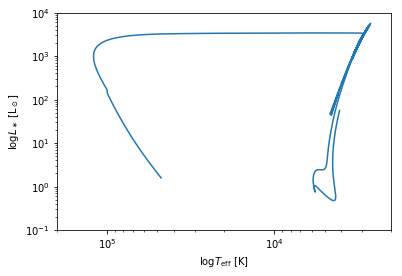

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
%matplotlib inline

# load the model track
file_track_solar = working_dir+'MIST/'+filename_eep+'/00100M.track.eep'
track_solar = ascii.read(file_track_solar)

# extract the age (in years), log10(luminosity) (in Lsun), and log10(effective temperature) (in K)
age, logL, logTe = track_solar['col1'], track_solar['col7'], track_solar['col12']

# plot the model HRD
Tlim = [200000, 2000]    # note: Teff is plotted backwards (see note below)
Llim = [0.1, 10000]
fig, ax = plt.subplots()
ax.plot(10**logTe, 10**logL)
ax.set_xlim(Tlim)
ax.set_ylim(Llim)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\log{T_{\rm eff}} \,\, [{\rm K}]$')
ax.set_ylabel(r'$\log{L_\ast} \,\, [{\rm L}_\odot]$')

A digression: Note that the $T_{\rm eff}$ axis is plotted backwards (high to low from left to right).  That's a quirk of the HRD because of the analogous (pre-cursor) "color-magnitude" diagram, which is purely observational rather than theoretical.  In that case, the $T_{\rm eff}$ axis is replaced by the "color" (a ratio between the emission strengths in two wavelength bands), which traditionally increased left to right (e.g., from 0.0 to 2.0).  "Low" color values correspond to *bluer* colors, higher to *redder* colors.  But blue corresponds to hotter temperatures, and vice versa...so you can see where the flip in the $T_{\rm eff}$ axis arises.  

There's an immense amount of physics encapsulated in the evolution of a Sun-like star in this HRD.  The star is "born" at the end of the curve in the middle right of the diagram.  At this point, the stellar envelope is inflated from its formation, and the whole star is convective as it contracts at roughly fixed $T_{\rm eff}$.  This nearly vertical evolution from convective contraction is known as the Hayashi track.  After $\sim$50 Myr, energy dissipation in the outer envelope of the star becomes dominated by radiation (rather than convection), and there is a pronounced "J"-shaped hook in the HRD.  By $\sim$100 Myr, we have reached that little wiggle at the end of the J's hook, which marks the "main-sequence".  All of that previous evolution is known as the "pre-main-sequence" phase.  It will be the sole concern of your project, but I'll digress to give a quick overview of the additional evolution in the HRD.

That little wiggle occurs around ($T_{\rm eff} = 5800$ K, $L_\ast = 1$ L$_\odot$), which are (perhaps obviously) the current parameters of the Sun.  Most of the star's life stays fixed right there...the main-sequence phase lasts from about 100 Myr to about 9 Gyr.  At that point, most of the hydrogen in the star's core is spent from nuclear fusion into helium.  When the helium starts to fuse, there's a lot more energy at the core that needs to make its way out.  That causes the star to expand again, and move up in $L_\ast$ dramatically.  This "ascent" in the HRD is known as the red giant branch.  It is relatively short-lived, and involves an oscillation in $L_\ast$ as different fusion products are generated in the core (the 2nd ascent is called the "asymptotic giant branch").  Eventually the core fuses sufficiently more massive atomic constituents that the stellar envelope is effectively blown off in a wind, creating a "planetary nebula".  That process occurs along the (aptly named) "horizontal branch", where $T_{\rm eff}$ increases at fixed $L_\ast$ as the very hot core of the star is revealed, eventually leaving behind a "white dwarf" star that contracts and fades for the rest of time (left-hand side of plot).  

Ok, let's focus on the pre-main-sequence (pre-MS) phase:

Text(0, 0.5, '$L_\\ast \\,\\, [{\\rm L}_\\odot]$')

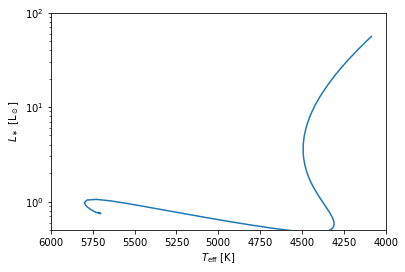

In [4]:
Tlim = [6000, 4000]    # note: Teff is plotted backwards (see note below)
Llim = [0.5, 100]
fig, ax = plt.subplots()
ax.plot(10**logTe[age < 1e8], 10**logL[age < 1e8])
ax.set_xlim(Tlim)
ax.set_ylim(Llim)
ax.set_yscale('log')
ax.set_xlabel(r'$T_{\rm eff} \,\, [{\rm K}]$')
ax.set_ylabel(r'$L_\ast \,\, [{\rm L}_\odot]$')

It can help to also look at the evolution of the stellar radius, $R_\ast$.  This (or rather $\log{R_\ast}$ in $R_\odot = 6.96 \times 10^{10}$ cm units) is available in 'track_solar['col8']'.  Make some plots to explore how $R_\ast$ evolves with age, luminosity, and effective temperature for this model of a pre-MS sun-like star.

Text(0, 0.5, 'age [Myr]')

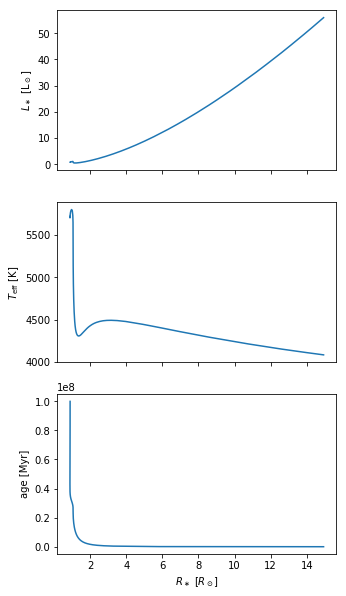

In [5]:
logr = track_solar['col14']
Tlim = [6000, 4000]
Llim = [0.1, 100]
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(5,10))
#Luminosity as function of stellar radius 
ax1.plot(10**logr[age < 1e8], 10**logL[age < 1e8])
ax1.set_ylabel(r'${L_\ast} \,\, [{\rm L}_\odot]$')
#ax1.set_yscale('log')
#Temperature as function of stellar radius 
ax2.plot(10**logr[age < 1e8], 10**logTe[age < 1e8])
ax2.set_ylabel(r'${T_{\rm eff}} \,\, [{\rm K}]$')
#ax2.set_yscale('log')
#Age as function of stellar radius 
ax3.plot(10**logr[age < 1e8], age[age < 1e8])
ax3.set_xlabel(r'${R_\ast} \,\, [R_\odot]$')
ax3.set_ylabel('age [Myr]')

Now let's examine the $M_\ast$-dependence of the HRD.  Generate a plot that shows the model tracks for $M_\ast = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]$ M$_\odot$.  Investigate how $M_\ast$ changes the behavior of models in the HRD as a function of stellar age (say from 1 to 100 Myr).  To do this, you need to know that each mass track filename is stored with a name like '00100M.track.eep'.  The numbers correspond to the mass, so that '00100' = 1.0 M$_\odot$, '00120' = 1.2 M$_\odot$, etc. 

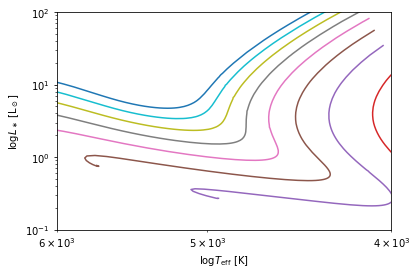

In [6]:
track_num = [10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
fig, ax = plt.subplots()

for i in track_num:
    file_track_mass = working_dir+'MIST/'+filename_eep+'/%sM.track.eep'% ("{:05d}".format(i))
    track_mass = ascii.read(file_track_mass)
    age, logL, logTe = track_mass['col1'], track_mass['col7'], track_mass['col12']
    ax.plot(10**logTe[age < 1e8], 10**logL[age < 1e8])
    ax.set_xlim(Tlim)
    ax.set_ylim(Llim)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$\log{T_{\rm eff}} \,\, [{\rm K}]$')
    ax.set_ylabel(r'$\log{L_\ast} \,\, [{\rm L}_\odot]$')

These evolutionary models usually also make available a different (although related and in some sense redundant) product, called *isochrones*.  An isochrone is the behavior of a model quantity at a fixed age (rather than a fixed mass, as for the mass tracks).  Let's load the ${\tt MIST}$ isochrones:

In [7]:
# load MIST isochrones in HRD 
file_isos = working_dir+'MIST/'+filename_iso+'/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_full.iso'
isos = ascii.read(file_isos)
iso_AGE, iso_L, iso_T = isos['col2'], isos['col9'], isos['col14']

# print the available isochrone ages: these are *log(age)* in yr units
for i in range(len(np.unique(iso_AGE))): print(np.unique(iso_AGE)[i])

5.0
5.05
5.1
5.15
5.2
5.25
5.3
5.35
5.4
5.45
5.5
5.55
5.6
5.65
5.7
5.75
5.8
5.8500000000000005
5.9
5.95
6.0
6.050000000000001
6.1000000000000005
6.15
6.2
6.25
6.300000000000001
6.3500000000000005
6.4
6.45
6.5
6.550000000000001
6.6000000000000005
6.65
6.7
6.75
6.800000000000001
6.8500000000000005
6.9
6.95
7.0
7.050000000000001
7.1000000000000005
7.15
7.200000000000001
7.25
7.300000000000001
7.3500000000000005
7.4
7.450000000000001
7.5
7.550000000000001
7.6000000000000005
7.65
7.700000000000001
7.75
7.800000000000001
7.8500000000000005
7.9
7.950000000000001
8.0
8.05
8.100000000000001
8.15
8.200000000000001
8.25
8.3
8.350000000000001
8.4
8.450000000000001
8.5
8.55
8.600000000000001
8.65
8.700000000000001
8.75
8.8
8.850000000000001
8.9
8.950000000000001
9.0
9.05
9.100000000000001
9.150000000000002
9.200000000000001
9.25
9.3
9.350000000000001
9.400000000000002
9.450000000000001
9.5
9.55
9.600000000000001
9.650000000000002
9.700000000000001
9.75
9.8
9.850000000000001
9.900000000000002
9.9500

Plot the HRD again, with the isochrones shown for fixed ages of 1, 2, 4, 8, 16, 32 Myr (or as near as possible to do those numbers).  It can be confusing, but ultimately helpful, to also show the mass tracks from before...you'll need to think about how to make this appear visually pleasing.

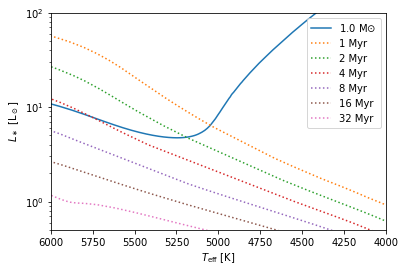

In [8]:
log_age = []
twopow = (2**np.arange(6.0))*1e6
for i in twopow:
    log_age.append(np.log10(i))
    
fig, ax = plt.subplots()
colors = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
Tlim = [6000, 4000]    # note: Teff is plotted backwards (see note below)
Llim = [0.5, 100]

ax.plot(10**logTe[age < 1e8], 10**logL[age < 1e8], label='1.0 M$\odot$')
ax.set_xlim(Tlim)
ax.set_ylim(Llim)
ax.set_yscale('log')
ax.set_xlabel(r'$T_{\rm eff} \,\, [{\rm K}]$')
ax.set_ylabel(r'$L_\ast \,\, [{\rm L}_\odot]$')

for i in range(len(log_age)):
    close_age = iso_AGE[np.abs(iso_AGE - log_age[i]).argmin()] #np.searchsorted(iso_AGE, i)] gives the idx+1
    iso_L_Myr = iso_L[iso_AGE == close_age]
    iso_T_Myr = iso_T[iso_AGE == close_age]
    ax.plot(10**iso_T_Myr, 10**iso_L_Myr, ':'+colors[i], label= "%d Myr" % (round(10**log_age[i])/1e6))
    ax.legend()
 
    
# old code
# ages = ((10**iso_AGE)/1e7)
# twopow = 2.0**np.arange(6.0)
# lum = 10**iso_L
# teff = 10**iso_T
# fx_teff, fx_lum = [], []
# idx = []

# for i in twopow:
#     idx.append((np.abs(ages - i)).argmin())
    
# for i in idx:
#     fx_teff.append(teff[i])
#     fx_lum.append(lum[i])


# fig, ax = plt.subplots()
# ax.plot(fx_teff, fx_lum)
# ax.set_xlabel(r'${T_{\rm eff}} \,\, [{\rm K}]$')
# ax.set_ylabel(r'${L_\ast} \,\, [{\rm L}_\odot]$')

The key takeaway, in a broad-brush sense, is that during the pre-MS phase of evolution, we are most sensitive to $M_\ast$ using $T_{\rm eff}$, and most sensitive to $t_\ast$ using $L_\ast$.  Effective temperatures increase with mass, and luminosities decrease with age.  

Ok, so *in principle* we can use some of these pre-MS model predictions to infer \{$M_\ast$, $t_\ast$\} from measurements of {$T_{\rm eff}$, $L_\ast$\}.  But in practice, that really doesn't work out.  One reason is that we often do not have *precise* measurements of {$T_{\rm eff}$, $L_\ast$\}, and even when we think we do they could easily be *biased* by various systematic uncertainties (i.e., they're *inaccurate*).  Another reason is that the stellar evolution models themselves have various systematic uncertainties.  A big part of this project is ultimately to try and figure out which of these issues matter, and how much they contribute to uncertainties on the stellar host properties.  Let's flesh each of these out in a little more detail.    

**Temperature and Luminosity _Systematics_**

Astronomers do not really *directly* measure $T_{\rm eff}$ or $L_\ast$...these are not *observable* properties.  $T_{\rm eff}$ is usually inferred from measurements of the patterns of absorption lines throughout the optical or near-infrared spectrum.  The temperature of the stellar atmosphere controls the abundances of various atomic, ionic, and even molecular species present there, and thereby which quantum transitions are available to absorb the radiation coming through the atmosphere layer.  Broadly speaking, there are four (related) techniques used to infer $T_{\rm eff}$ from a spectrum: (1) spectral typing; (2) line indices; (3) forward-modeling; and (4) machine learning.  These are sort of  in the order of most-to-least common, and least-to-most sophisticated/challenging.  

(1) Spectral typing is the traditional methodology.  This is essentially comparing the spectrum to a *template* star, with a "known" *spectral type*, to look for clear patterns in the presence and strengths of various absorption lines.  Those templates have either been modeled in detail, or their physical properties have been *benchmarked* by another methodology (more on this later).  The spectral classification system assigns a letter, a number, and a roman numeral.  The letter refers to the pattern in the absorption lines that is associated with $T_{\rm eff}$.  Options are O, B, A, F, G, K, M, L, T, Y (for odd historical reasons), from high-to-low $T_{\rm eff}$.  The numbers are subdivisions in each type.  The roman numerals are the "luminosity class" and refer to absorption line features that are sensitive to the *surface gravity*, $\log{g}$, where $g = G M_\ast / R_\ast^2$; larger values mean higher $\log{g}$.  For example, the Sun is a G2V star: G stars have $T_{\rm eff} \approx 5000$-6000 K, the 2 puts $T_{\rm eff}$ toward the higher end of that range ($\sim$5700-5800 K), and the V refers to a main-sequence surface gravity.  Eventually, the Sun will become a red giant star with luminosity class III, as it's atmosphere expands when it leaves the main-sequence.  If you look at the pre-MS part of the HRD, it is not too different from the giant branch.  The typical surface gravities of pre-MS stars would put them in a luminosity class IV, basically a mixture of giant (III) and main-sequence (V).  That is one of the challenges of "typing" a young star...there are no luminosity class IV template stars to use for guidance!

In this technique, the spectral type is the observable quantity.  One then associates that spectral type with $T_{\rm eff}$ with a look-up table.  The plot below shows a typical such table in common usage.  It was compiled based on main-sequence stars, though (more on that below).

Text(0, 0.5, '$T_{\\rm eff} \\,\\, [{\\rm K}]$')

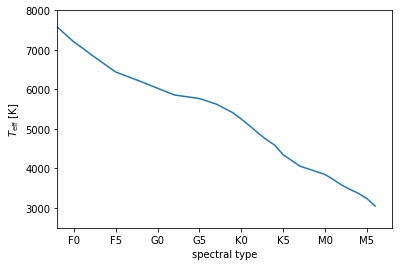

In [9]:
conv = ascii.read('../data/KH95_dwarf_spt-teff.dat')
spt, spt_idx, teff = conv['col1'], conv['col2'], conv['col3']

fig, ax = plt.subplots()
ax.plot(spt_idx, teff)
ax.set_xlim([28, 68])
ax.set_xticklabels(spt[np.in1d(spt_idx, ax.get_xticks())])
ax.set_xlabel('spectral type')
ax.set_ylim([2500, 8000])
ax.set_ylabel(r'$T_{\rm eff} \,\, [{\rm K}]$')

Usually, the classification uncertainty is roughly $\pm$1 sub-type -- so we would say a star has a spectral type K4$\pm$1, meaning K3 or K5 are possible (with less probability).  Write some code to determine the effective temperature and uncertainty in this case, based on the above lookup table.  (Note that some have recently argued that they can classify M stars within $\pm$0.25 sub-types.)  Hang on to this, we'll come back to it later.        

In [10]:
#All isochrone data
#conv.pprint(max_lines=-1, max_width=-1)

spt_newidx = []
upper = []
lower = []

for i in spt_idx: #normalizing spt_idx to start at 0
    if i >= 60:
        spt_newidx.append(i-12)
    else:
        spt_newidx.append(i-10)
        
for i in spt_newidx:
    try:
        if (teff[i-1]-teff[int(i)]) > 0: #upper bound needs to be positive
            upper.append(teff[i-1]-teff[int(i)])
        else: #faulty negative values
            upper.append(0)
    except: #cannot calculate upper bound (first and last elements)
        upper.append(0)
    try: 
        if (teff[i]-teff[i+1]) > 0: #same as above
            lower.append(teff[i]-teff[i+1])
        else:
            lower.append(0)
    except:
        lower.append(0)
        
for i in spt_newidx: #printing out results
    print('Spectral type: %s \n Temperature: %s K \n +: %s K \n -: %s K \n \n' % (spt[i], teff[i], upper[i], lower[i]))

Spectral type: B0 
 Temperature: 30000 K 
 +: 0 K 
 -: 4600 K 
 

Spectral type: B1 
 Temperature: 25400 K 
 +: 4600 K 
 -: 3400 K 
 

Spectral type: B2 
 Temperature: 22000 K 
 +: 3400 K 
 -: 3300 K 
 

Spectral type: B3 
 Temperature: 18700 K 
 +: 3300 K 
 -: 1700 K 
 

Spectral type: B4 
 Temperature: 17000 K 
 +: 1700 K 
 -: 1600 K 
 

Spectral type: B5 
 Temperature: 15400 K 
 +: 1600 K 
 -: 1400 K 
 

Spectral type: B6 
 Temperature: 14000 K 
 +: 1400 K 
 -: 1000 K 
 

Spectral type: B7 
 Temperature: 13000 K 
 +: 1000 K 
 -: 1100 K 
 

Spectral type: B8 
 Temperature: 11900 K 
 +: 1100 K 
 -: 1400 K 
 

Spectral type: B9 
 Temperature: 10500 K 
 +: 1400 K 
 -: 980 K 
 

Spectral type: A0 
 Temperature: 9520 K 
 +: 980 K 
 -: 290 K 
 

Spectral type: A1 
 Temperature: 9230 K 
 +: 290 K 
 -: 260 K 
 

Spectral type: A2 
 Temperature: 8970 K 
 +: 260 K 
 -: 250 K 
 

Spectral type: A3 
 Temperature: 8720 K 
 +: 250 K 
 -: 260 K 
 

Spectral type: A4 
 Temperature: 8460 K 
 +: 260 K

So, you've just made some estimate of the *precision* with which this method (and indeed essentially all the methods) can infer $T_{\rm eff}$.  But it relies on a conversion between an *observable* (spectral type, in this case) and a *physical* property ($T_{\rm eff}$).  Is that conversion accurate?  We must presume the conversion itself has its own precision, and possibly biases.  One way to look at that is to compare various attempts at this conversion!

Text(0, 0.5, '$T_{\\rm eff} \\,\\, [{\\rm K}]$')

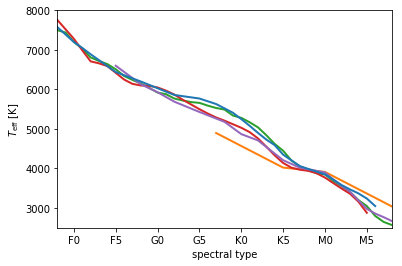

In [11]:
fig, ax = plt.subplots()

convs = ['vB99_giant', 'PM13_dwarf', 'PM13_pms', 'HH14_pms', 'KH95_dwarf']
colors = ['C1', 'C2', 'C3', 'C4', 'C0']

for i in range(len(convs)):
    conv = ascii.read('../data/'+convs[i]+'_spt-teff.dat')
    spt, spt_idx, teff = conv['col1'], conv['col2'], conv['col3']
    
    ax.plot(spt_idx, teff, '-'+colors[i], lw=2)
    
ax.set_xlim([28, 68])
ax.set_xticklabels(spt[np.in1d(spt_idx, ax.get_xticks())])
ax.set_xlabel('spectral type')
ax.set_ylim([2500, 8000])
ax.set_ylabel(r'$T_{\rm eff} \,\, [{\rm K}]$')

So, what *systematic* uncertainty in $T_{\rm eff}$ would you ascribe to a K4 star, given the range of these predicted models?  

In [12]:
teff_predict = [] #predictions of t_eff
target = 0 #will store KH95_dwarf t_eff as a target

for i in range(len(convs)):
    conv = ascii.read('../data/'+convs[i]+'_spt-teff.dat')
    spt, spt_idx, teff = conv['col1'], conv['col2'], conv['col3']
    kfour_idx = np.searchsorted(spt, 'K4') #finds the index of K4
    teff_predict.append(teff[kfour_idx])
    if i == (len(convs)-1):
        target = teff[kfour_idx] #stores KH95_dwarf t_eff as a target

max_teff = np.amax(teff_predict)
min_teff = np.amin(teff_predict)
upper = max_teff - target
lower = target - min_teff
        
print('Spectral type: %s \n Temperature: %s K \n +: %s K \n -: %s K \n \n' % ('K4', target, upper, lower))
print('K4 Effective Temperature values, per model:')
print(teff_predict)

Spectral type: K4 
 Temperature: 4590 K 
 +: 30 K 
 -: 458 K 
 

K4 Effective Temperature values, per model:
[4132, 4620, 4330, 4210, 4590]


We will fold back in this exploration of uncertainties later.  For now, we want to consider how we would "convert" a ($T_{\rm eff}$, $L_\ast$) into an ($M_\ast$, $t_\ast$).  This is straightforward if ($T_{\rm eff}$, $L_\ast$) happens to lie exactly on a point calculated in the model library, but that is generally not the case.  So, we'll need to do some form of interpolation.  Let's set up an example where $T_{\rm eff} = 4376$ K and $L_\ast = 1.5$ L$_\odot$.  The first thing we'll do is collect all the (relevant) mass tracks and then interpolate along them to find $T_{\rm eff}(M_\ast)$ at this fixed $L_\ast$.  

You should create an ASCII file that is just a list of the mass tracks.  Go into '/preMS_models/MIST/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS/' in a terminal and type (remove the # first)

In [13]:
#ls *eep > trackslist.txt

Then you can edit 'trackslist.txt' and delete the lines with filenames after '00500M.track.eep'...in this project, we'll never deal with stars that have $M_\ast > 5 M_\odot$, so we can ignore those other files.  Now, back to the notebook...

Let's loop through these mass tracks and collect the relevant parameter values:

In [26]:
# load mass track filenames
tracks = np.loadtxt(working_dir+'MIST/'+filename_eep+'/trackslist.txt', dtype=str).T

# max(age) to consider
max_age = 1e8

logTe, logL, logM, logt = [], [], [], []
for i in range(len(tracks)):
    # load a mass track
    track = ascii.read(working_dir+'MIST/'+filename_eep+'/'+tracks[i])

    # extract the age (in years), mass (in Msun), log10(Lstar) (in Lsun), and log10(Teff) (in K)
    age, mass, logLstar, logTeff = track['col1'], track['col2'], track['col7'], track['col12']
    
    # cap the track at a fixed upper bound in age
    logT_tr = logTeff[age <= max_age]
    logL_tr = logLstar[age <= max_age]
    mass_tr = np.log10(mass[age <= max_age])
    age_tr = np.log10(age[age <= max_age])
    
    # add to the list!
    logTe = np.concatenate((logTe, logT_tr))
    logL = np.concatenate((logL, logL_tr))
    logM = np.concatenate((logM, mass_tr))
    logt = np.concatenate((logt, age_tr))    


Now we will use an unstructured 2-D interpolator to get the mass and age we need based on those tracks:

In [27]:
from scipy.interpolate import griddata

# the input points in the HRD
points = np.column_stack((logTe, logL))

# the values of the parameter of interest corresponding to those points
values = logM

# perform the interpolation at the (Teff, Lstar) of interest
mass_est = griddata(points, values, (np.log10(4376.), np.log10(1.5)), method='linear')
print('Mass estimate: %s' % 10.**mass_est)

# repeat for the ages
values = logt
age_est = griddata(points, values, (np.log10(4376.), np.log10(1.5)), method='linear')
print('Age estimate: %s' % (10.**age_est/1e6))

Mass estimate: 0.9265818047071253
Age estimate: 1.2505236954136991


It would be instructive to use this approach to calculate masses and ages over a regular grid on the HRD.  So, define an input set of regularly-spaced ($\log{T_{\rm eff}}$, $\log{L_\ast}$) points that span the ${\tt MIST}$ model-space in the HRD, and calculate the $M_\ast$ and $t_\ast$ at each point.  Then make plots that show the variations of $M_\ast$ and $t_\ast$ across the HRD, with scalebars.  You can find an example of how to use ${\tt astropy}$ to stretch / display such plots [at this notebook](https://github.com/seanandrews/DSHARP_CPDs/blob/master/Part1_ImageManipulation.ipynb).

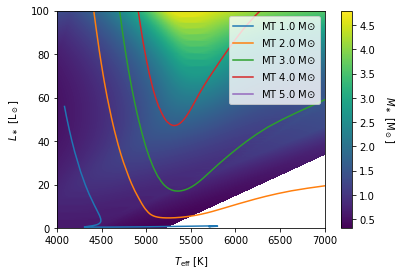

In [28]:
# generate spaced values (log scale)
tspce = np.linspace(np.log10(4000), np.log10(7000), 1000)
lspce = np.linspace(np.log10(0.1), np.log10(100), 1000)

# generate grid and coordinates
xy, yx = np.meshgrid(tspce, lspce) #grid
lumteffgrid = np.column_stack((xy.ravel(), yx.ravel())) 
#lumteffgrid = np.dstack((xy.T, yx.T)) #coordinates starting from (tspace[0], lspace[0])

# the input points in the HRD
points = np.column_stack((logTe, logL))

# MASS
# the values of mass corresponding to those points
values = logM

mass_est = 10**griddata(points, values, lumteffgrid, method = 'linear')
# test = griddata(points, values, (tspce[0], lspce[0]), method = 'linear')
# test2 = griddata(points, values, (tspce[-1], lspce[0]), method = 'linear')

mass_image = np.reshape(mass_est, (1000, 1000))

# mass_image = np.rot90(mass_est)
# #if you want to plot high to low teff, then flip mass_image about axis 1
# mass_image = np.flip(mass_image, axis=1)

In [ ]:
# Mass Plot
fig, ax = plt.subplots()
im = ax.imshow(mass_image, origin='lower', aspect='auto', extent=[4000,7000,0.1,100])
ax.set_xlabel(r'$T_{\rm eff} \,\, [{\rm K}]$', labelpad=10)
ax.set_ylabel(r'${L_\ast} \,\, [{\rm L}_\odot]$', labelpad=10)

cb = plt.colorbar(im, ax=ax, pad = 0.05)
cb.set_label(r'${M_\ast} \,\, [{\rm M}_\odot]$', rotation=270, labelpad=20)

track_num = [100, 200, 300, 400, 500]

Tlim = [4000, 7000]    # note: Teff is plotted backwards (see note below)
Llim = [0.1, 100]

for i in track_num: #mass tracks 1-5 solar mass
    file_track_mass = working_dir+'MIST/'+filename_eep+'/%sM.track.eep'% ("{:05d}".format(i))
    track_mass = ascii.read(file_track_mass)
    age, logL, logTe = track_mass['col1'], track_mass['col7'], track_mass['col12']
    ax.plot(10**logTe[age < 1e8], 10**logL[age < 1e8], label = 'MT %s M$\odot$' % (i/100))
    ax.set_xlim(Tlim)
    ax.set_ylim(Llim)
    ax.legend()

In [19]:
lumteffgrid[0:2]

array([[[ 3.60205999, -1.        ],
        [ 3.60205999, -0.996997  ],
        [ 3.60205999, -0.99399399],
        ...,
        [ 3.60205999,  1.99399399],
        [ 3.60205999,  1.996997  ],
        [ 3.60205999,  2.        ]],

       [[ 3.60230327, -1.        ],
        [ 3.60230327, -0.996997  ],
        [ 3.60230327, -0.99399399],
        ...,
        [ 3.60230327,  1.99399399],
        [ 3.60230327,  1.996997  ],
        [ 3.60230327,  2.        ]]])

In [29]:
# AGES
# the values of age corresponding to those points
values = logt
age_est = 10**(griddata(points, values, lumteffgrid, method= 'linear'))/1e6

age_image = np.rot90(age_est)
#if you want to plot high to low teff, then flip mass_image about axis 1
age_image = np.flip(age_image, axis=1) 
    
# Ages Plot
fig, ax = plt.subplots()
im = ax.imshow(age_image, origin='lower', aspect='auto', extent=[7000,4000,0.1,100])
ax.set_xlabel(r'$T_{\rm eff} \,\, [{\rm K}]$', labelpad=10)
ax.set_ylabel(r'${L_\ast} \,\, [{\rm L}_\odot]$', labelpad=10)

cb = plt.colorbar(im, ax=ax, pad = 0.05)
cb.set_label('age [Myr]', rotation=270, labelpad=20)

log_age = [np.log10(1e7), np.log10(2e7), np.log10(4e7), np.log10(8e7) ] #1Myr and 2Myr
colors = ['C1', 'C2', 'C3', 'C4']

Tlim = [7000, 4000]    # note: Teff is plotted backwards (see note below)
Llim = [0.1, 100]

for i in range(len(log_age)):
    close_age = iso_AGE[np.abs(iso_AGE - log_age[i]).argmin()] #np.searchsorted(iso_AGE, i)] gives the idx+1
    iso_L_Myr = iso_L[iso_AGE == close_age]
    iso_T_Myr = iso_T[iso_AGE == close_age]
    ax.plot(10**iso_T_Myr, 10**iso_L_Myr, ':'+colors[i], label= "Iso %d Myr" % (round(10**log_age[i])/1e6))
    ax.set_xlim(Tlim)
    ax.set_ylim(Llim)
    ax.legend()


ValueError: Axes must be different.

### OLD
Now, let's doublecheck that those numbers make sense.  Make a plot of the HRD around the desired ($T_{\rm eff}$, $L_\ast$\) point, and plot the mass tracks and isochrones that neighbor the derived values:

In [ ]:
#mass tracks
Tlim = [5000, 4000]    # note: Teff is plotted backwards (see note below)
Llim = [0.5, 2]
fig, ax = plt.subplots()
ax.plot(4376, 1.5, marker='o', markersize=10, color="red")
ax.set_xlim(Tlim)
ax.set_ylim(Llim)
ax.set_xlabel(r'$\log{T_{\rm eff}} \,\, [{\rm K}]$')
ax.set_ylabel(r'$\log{L_\ast} \,\, [{\rm L}_\odot]$')

track_num = [80, 90, 100, 110, 120]

for i in track_num: #mass tracks near 0.93 Msun
    file_track_mass = working_dir+'MIST/'+filename_eep+'/%sM.track.eep'% ("{:05d}".format(i))
    track_mass = ascii.read(file_track_mass)
    age, logL, logTe = track_mass['col1'], track_mass['col7'], track_mass['col12']
    ax.plot(10**logTe[age < 1e8], 10**logL[age < 1e8], label = 'MT %s M$\odot$' % (i/100))
    ax.set_xlim(Tlim)
    ax.set_ylim(Llim)
    ax.set_xlabel(r'${T_{\rm eff}} \,\, [{\rm K}]$')
    ax.set_ylabel(r'${L_\ast} \,\, [{\rm L}_\odot]$')

#isochrone
log_age = [np.log10(1000000), np.log10(2000000)] #1Myr and 2Myr
colors = ['C1', 'C2']

for i in range(len(log_age)):
    close_age = iso_AGE[np.abs(iso_AGE - log_age[i]).argmin()] #np.searchsorted(iso_AGE, i)] gives the idx+1
    iso_L_Myr = iso_L[iso_AGE == close_age]
    iso_T_Myr = iso_T[iso_AGE == close_age]
    ax.plot(10**iso_T_Myr, 10**iso_L_Myr, ':'+colors[i], label= "Iso %d Myr" % (round(10**log_age[i])/1e6))
    ax.legend()

Ok, now we can also look into the weirdness that happens in the previous plot at $T_{\rm eff} \gtrsim 4500$ K.  I think this is not some bad interpolation issue, but rather just that this is where the mass tracks start to get complicated (bend over to higher $T_{\rm eff}$ at nearly fixed $L_\ast$) in the HRD.  Examine this issue by plotting the relevant part of the HRD and the mass tracks in that part of parameter-space.  (It might help to overlay the fixed $L_\ast$ slice we're considering as a horizontal line.). What's happening?  Are the mass tracks double-valued in $T_{\rm eff}$ at this $L_\ast$?  

In [ ]:
Tlim = [7000, 4000]    # note: Teff is plotted backwards (see note below)
Llim = [0.5, 3]
fig, ax = plt.subplots()
x = np.linspace(4000, 7000, 1000)
y = np.linspace(1.5, 1.5, 1000)
ax.plot(x, y, ':r', label=r'fixed 1.5 $L_\ast$')

track_num = [100, 104, 108, 112, 116, 120, 124, 128]

for i in track_num: #mass tracks near 0.93 Msun
    file_track_mass = working_dir+'MIST/'+filename_eep+'/%sM.track.eep'% ("{:05d}".format(i))
    track_mass = ascii.read(file_track_mass)
    age, logL, logTe = track_mass['col1'], track_mass['col7'], track_mass['col12']
    ax.plot(10**logTe[age < 1e8], 10**logL[age < 1e8], label = 'MT %s M$\odot$' % (i/100))
    ax.set_xlim(Tlim)
    ax.set_ylim(Llim)
    ax.set_xlabel(r'${T_{\rm eff}} \,\, [{\rm K}]$')
    ax.set_ylabel(r'${L_\ast} \,\, [{\rm L}_\odot]$')
    ax.legend()

Mass track of 1.2 M$\odot$ has overlapping value at 1.5 $L_\ast$